To get started, run the following commands to install the module for OpenAI.

In [2]:
!pip install openai


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\josesariol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Initialize the Azure OpenAI environment variables and define function

The first step is to initialize the environment variables with the API key and endpoint URL issued by your Azure OpenAI resource. This will allow you to access the OpenAI service in the subsequent processing.

Next, you define a function that interacts with the OpenAI service. This function generates questions using the specified model and prompt (input text). You can adjust the length and diversity of the generated questions through the function's arguments.

Inside the function, it establishes a connection to Azure OpenAI using the API information retrieved from the environment variables, and then calls the OpenAI API to generate the question. The generated question is returned as text.

With these preparations, you can generate questions from Azure OpenAI's language model simply by specifying the appropriate model and prompt, then executing the function.

In [3]:
from openai import AzureOpenAI # This test openai version is 1.13.3
import json

# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)

client = AzureOpenAI(
  azure_endpoint = config_details["OPENAI_API_BASE"], 
  api_key=config_details["OPENAI_API_KEY"],
  api_version=config_details["OPENAI_API_VERSION"]
)



def create_diagram(content):

    print("Creating a diagram. Please wait...")

    message_text = [
        {"role":"system",
        "content":"You are tasked with illustrating Azure learners using mermaid diagrams. Here is a question to help you get started."},
        {"role":"user",
        "content":content}
    ]

    completion = client.chat.completions.create(
    model=config_details["DEPLOYMENT_NAME"], # model = "deployment_name"
    messages = message_text,
    temperature=0.7,
    max_tokens=800,
    top_p=0.95,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None
    )

    print(completion.choices[0].message.content)


It's very simple after that. Please run the following code. By changing the content, the diagram of the generated will vary, so you should find it enjoyable. Diagram generation takes around 10 seconds.

In [5]:
content = 'new retail product release' 
create_diagram(content)

Creating a diagram. Please wait...
To illustrate the process of a new retail product release using a Mermaid diagram, we'll create a flowchart that outlines the key steps involved in this process. This will include stages like product development, market analysis, manufacturing, marketing, and distribution.

Here is a Mermaid diagram code that represents the process:

```mermaid
flowchart TD
    A[Start] --> B[Product Ideation]
    B --> C[Market Analysis]
    C --> D[Product Development]
    D --> E[Prototype Testing]
    E --> F{Test Successful?}
    F -- Yes --> G[Mass Production]
    F -- No --> D
    G --> H[Marketing and Promotion]
    H --> I[Distribution]
    I --> J[Product Launch]
    J --> K[Collect Customer Feedback]
    K --> L{Feedback Positive?}
    L -- Yes --> M[Continue Regular Sales]
    L -- No --> N[Product Improvement]
    N --> D
    M --> O[End]
```

This flowchart starts with product ideation and goes through several steps including market analysis, product dev

Try pasting the mermaid section generated by running the code into the following site: There are various sites that output mermaid format code to shapes.

https://mermaid.live/

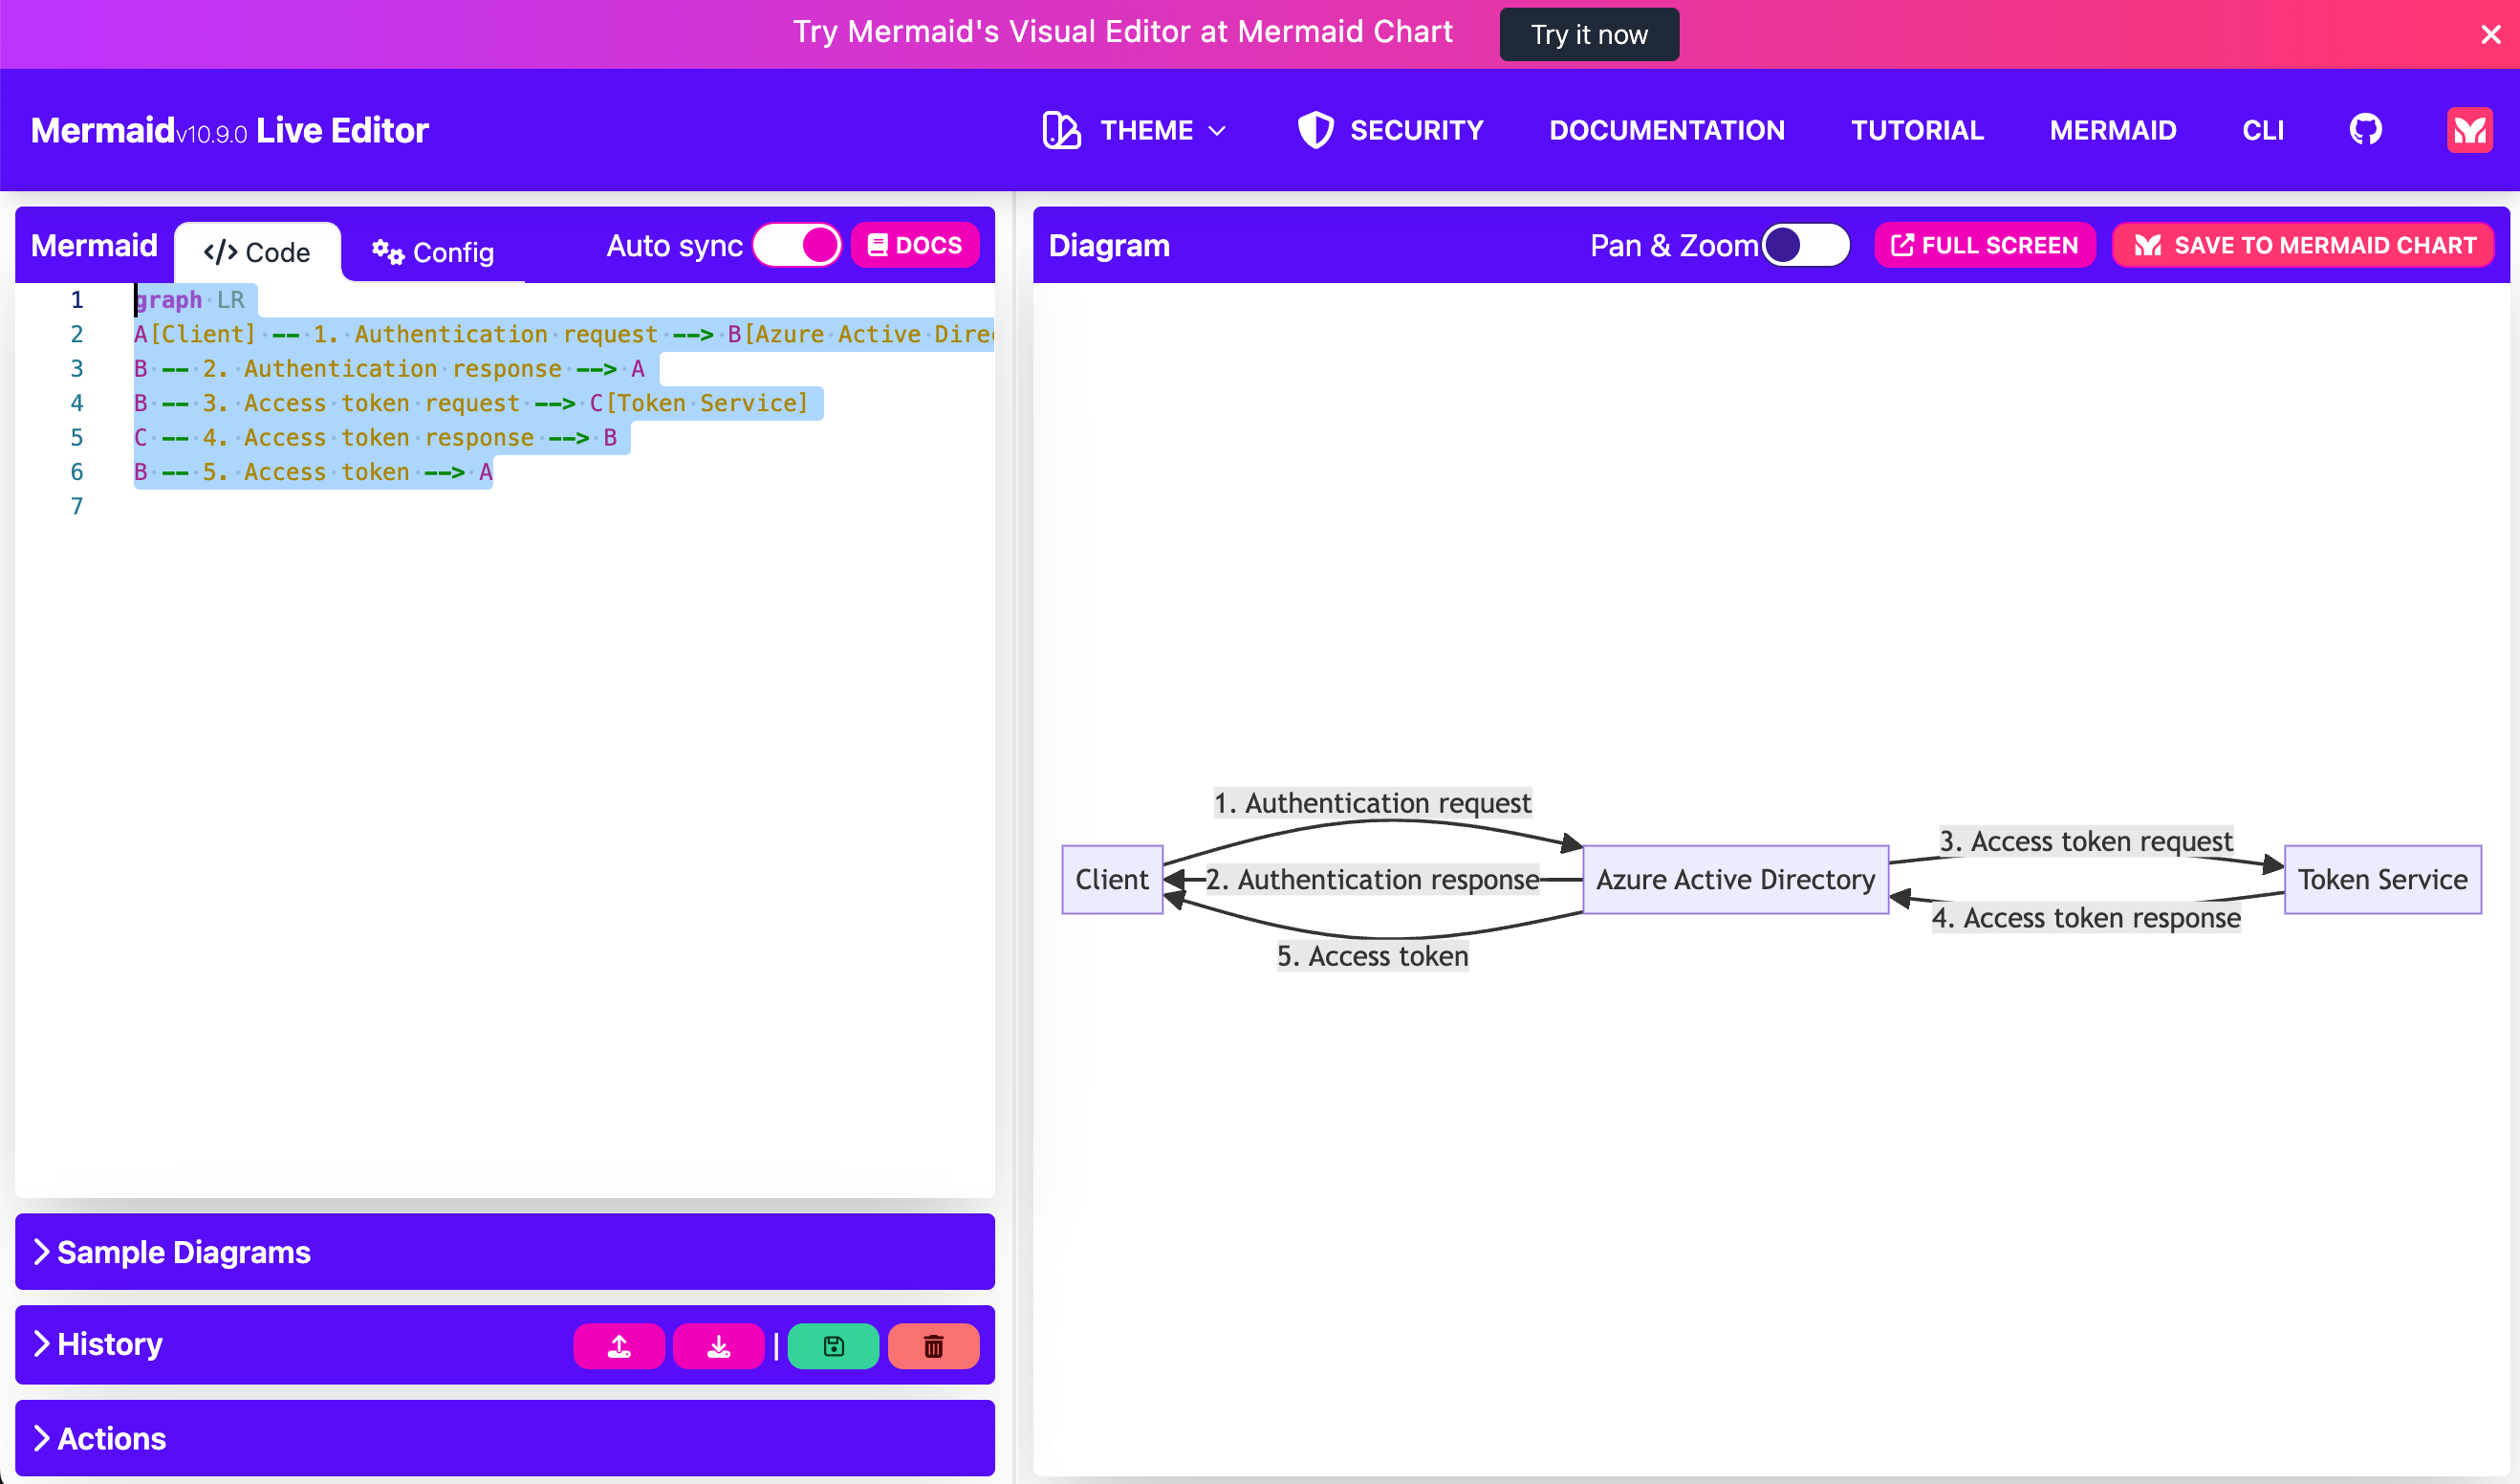

I'll provide another sample:

In [26]:
content = 'Relationship between multiple App Service Plan and App Service'
create_diagram(content)

Creating a diagram. Please wait...
To illustrate the relationship between multiple App Service Plans and App Services, you can use the following mermaid diagram:

```mermaid
graph LR
    A[App Service Plan 1] --> B[App Service 1]
    A[App Service Plan 1] --> C[App Service 2]
    A[App Service Plan 1] --> D[App Service 3]
    E[App Service Plan 2] --> F[App Service 4]
    E[App Service Plan 2] --> G[App Service 5]
    E[App Service Plan 2] --> H[App Service 6]
```

In this diagram, each App Service Plan (A and E) is connected to multiple App Services (B, C, D and F, G, H respectively). This represents the relationship where multiple App Services are hosted on different App Service Plans.


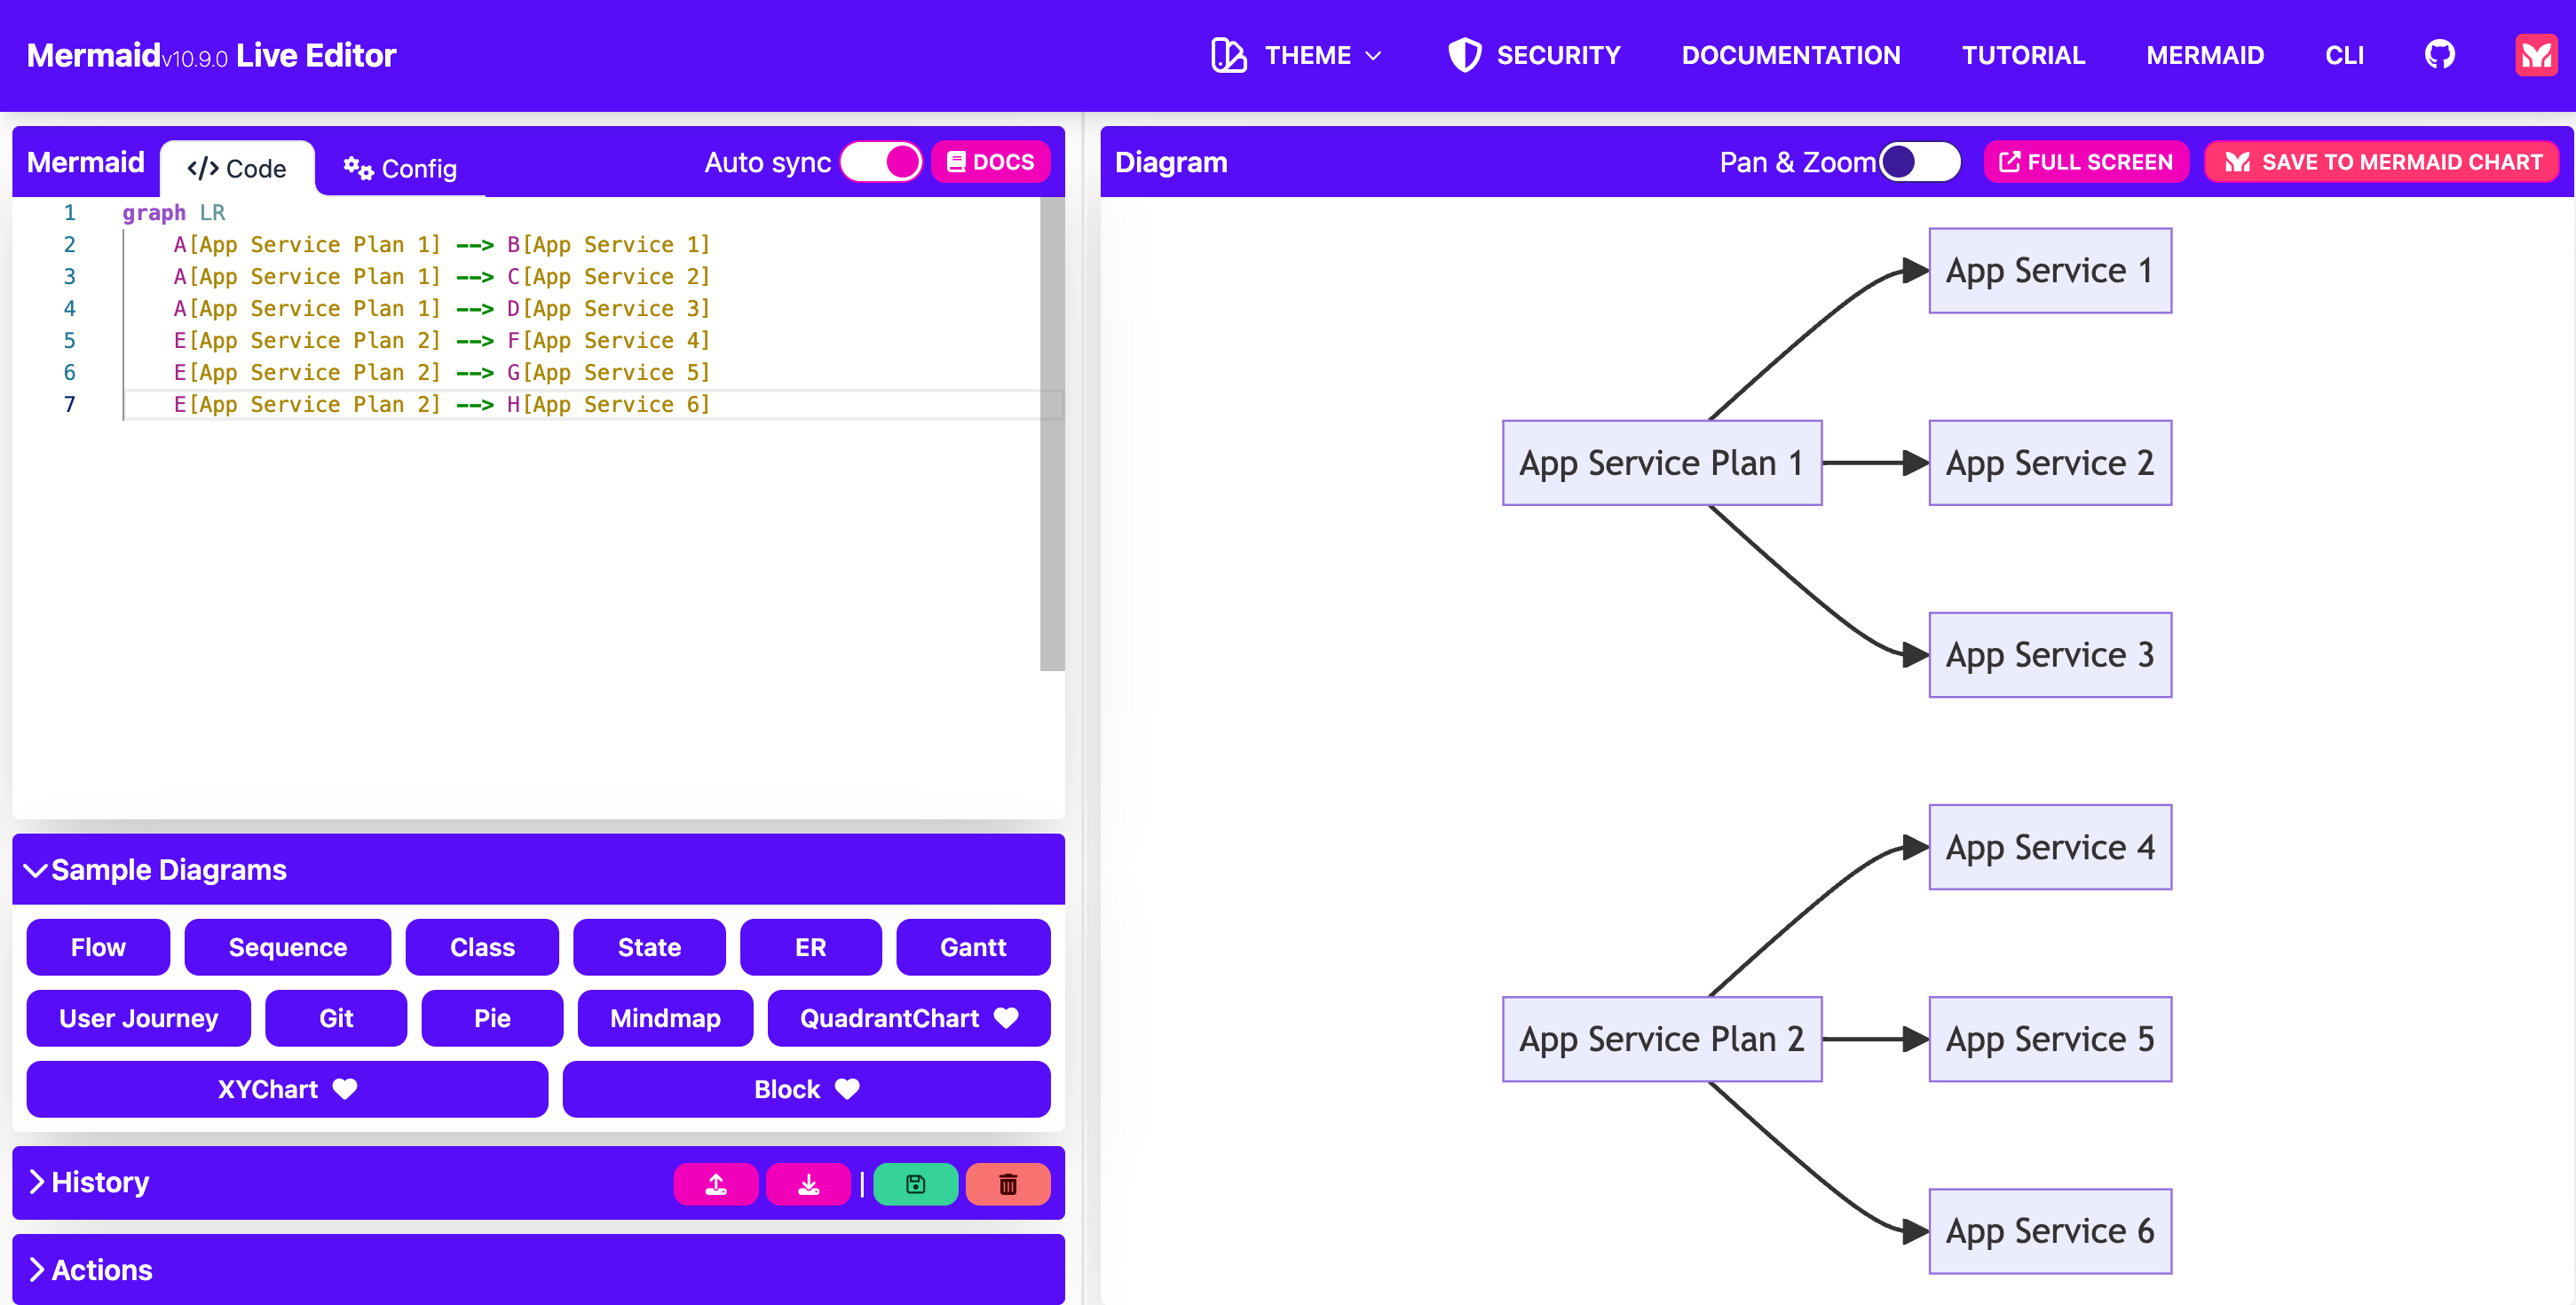

To learn more about what types of charts you can create, please visit this site. There are various types of diagrams available for you to try.

https://mermaid.js.org/ecosystem/tutorials.html